### Introduction & Objective

This notebooks aims to design and develop a linear model that can accurately predict the high and low prices of any given week for Crude Oil based off historical data. 

### Data Description

The data was fetched from yahoo finance on: https://finance.yahoo.com/quote/CL%3DF/history?p=CL%3DF

Our data consists of the following columns:

```Date,Open,High,Low,Close,Adj Close,Volume```

Where we are trying to predict **High** and **Low**. Note that these values are the averages of any given week on **Date**. **Volume** refers to liquidity or the number of shares traded averaged over the week.


### Data Preprocessing

Luckily, our data is already in a pretty good shape. So, we'll just import the necessary libraries and then read in the CSV.

In [10]:
# Import data
import pandas as pd
import seaborn as sns

# Transform data into dataframe
df = pd.read_csv('../data/oil.csv')

In [11]:
# DIsplay the data
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,2000-08-21,31.950001,32.799999,31.320000,32.049999,32.049999,196964
1,2000-08-28,32.040001,33.700001,31.860001,33.380001,33.380001,277879
2,2000-09-04,33.950001,35.500000,33.400002,33.700001,33.700001,292934
3,2000-09-11,33.799999,36.099998,33.119999,35.849998,35.849998,471966
4,2000-09-18,36.200001,37.799999,32.500000,32.650002,32.650002,437408
...,...,...,...,...,...,...,...
1217,2023-12-18,71.680000,75.370003,70.639999,73.559998,73.559998,1051929
1218,2023-12-25,73.559998,76.180000,71.250000,71.650002,71.650002,939272
1219,2024-01-01,71.709999,74.239998,69.279999,73.809998,73.809998,1335845
1220,2024-01-08,73.510002,75.250000,70.129997,72.680000,72.680000,1855756


### Analytical Model Description

We define our model using sklearns LinearRegression Linear Model. The model will be trained off data that predicts the `High` and `Low` of Crude Oil on any given week based off `Open`, `Close`, and `Volume`.

### The Architectural Model (Pipeline) Used

We define our model and data X (Open, Close, and Volume) and data Y (High and Low) below

### Model Implementation

In [12]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
# Data preprocessing

X = df[['Open', 'Close', 'Volume']]
y = df[['High', 'Low']]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

model = LinearRegression()
model.fit(X_train
          , y_train)

LinearRegression()

Assumptions Verification

In [13]:
# Model coefficients
print("Model Coefficients: ", model.coef_)

Model Coefficients:  [[ 5.90365530e-01  4.33224694e-01  1.82201522e-07]
 [ 4.16204991e-01  5.59374477e-01 -4.61607637e-07]]


Deployment

In [14]:
predictions = model.predict(X_test)

## Execution

### Results

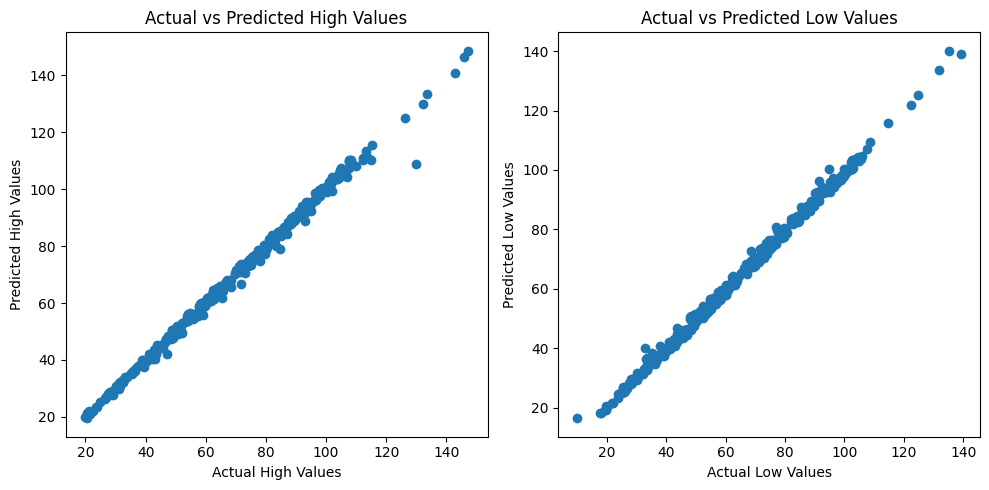

In [15]:
import matplotlib.pyplot as plt

# New code for scatter plot
plt.figure(figsize=(10, 5))

# Scatter plot for 'High' predictions
plt.subplot(1, 2, 1)
plt.scatter(y_test['High'], predictions[:, 0])
plt.xlabel('Actual High Values')
plt.ylabel('Predicted High Values')
plt.title('Actual vs Predicted High Values')

# Scatter plot for 'Low' predictions
plt.subplot(1, 2, 2)
plt.scatter(y_test['Low'], predictions[:, 1])
plt.xlabel('Actual Low Values')
plt.ylabel('Predicted Low Values')
plt.title('Actual vs Predicted Low Values')

plt.tight_layout()
plt.show()

### Results explanation

The figure above describes the relationship of Predicted vs Actual. The closer the points are to y=x, the better the model has fit.

By eyeballing we can see that the model was able to predict the values for high and low with a pretty good precision.

### Time series of Actual Low and High

### Model Validation

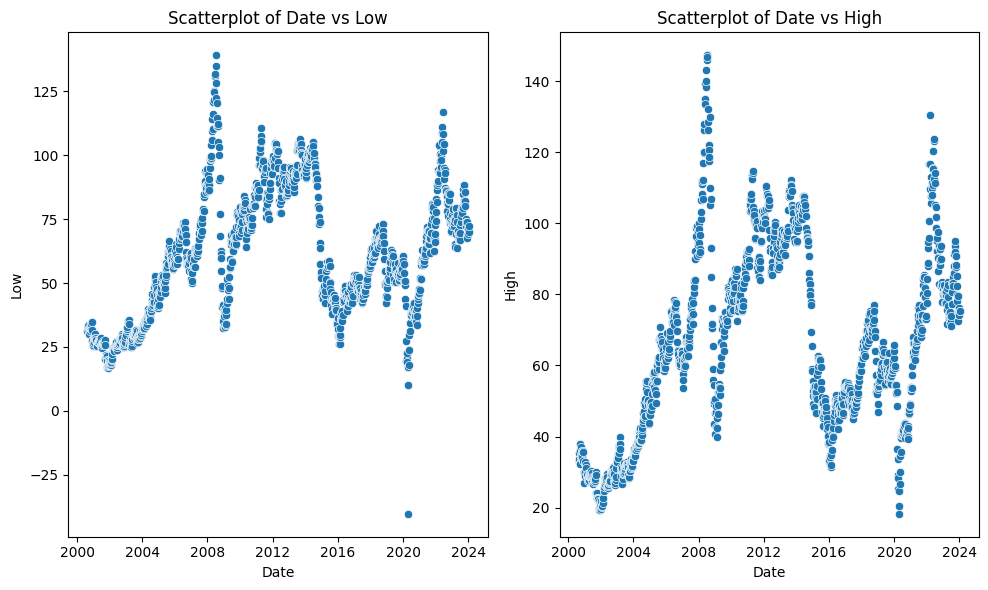

In [16]:
# Convert 'Date' to datetime if it's not already
df['Date'] = pd.to_datetime(df['Date'])

plt.figure(figsize=(10, 6))

# Plot 'Date' vs 'Low'
plt.subplot(1, 2, 1)
sns.scatterplot(x='Date', y='Low', data=df)
plt.title('Scatterplot of Date vs Low')

# Plot 'Date' vs 'High'
plt.subplot(1, 2, 2)
sns.scatterplot(x='Date', y='High', data=df)
plt.title('Scatterplot of Date vs High')

plt.tight_layout()
plt.show()

### Explanation

This is a time series graph that illustrates the actual High and Low of Crude Oil over time.

In [26]:
X_test.index

Index([ 231,  422,   43, 1007,  552,  906,  858,  358,  994,  912,
       ...
        478,  273,  707,  237,  755,    2,    6,  311, 1049,  846],
      dtype='int64', length=367)

### Time series of predicted low and high

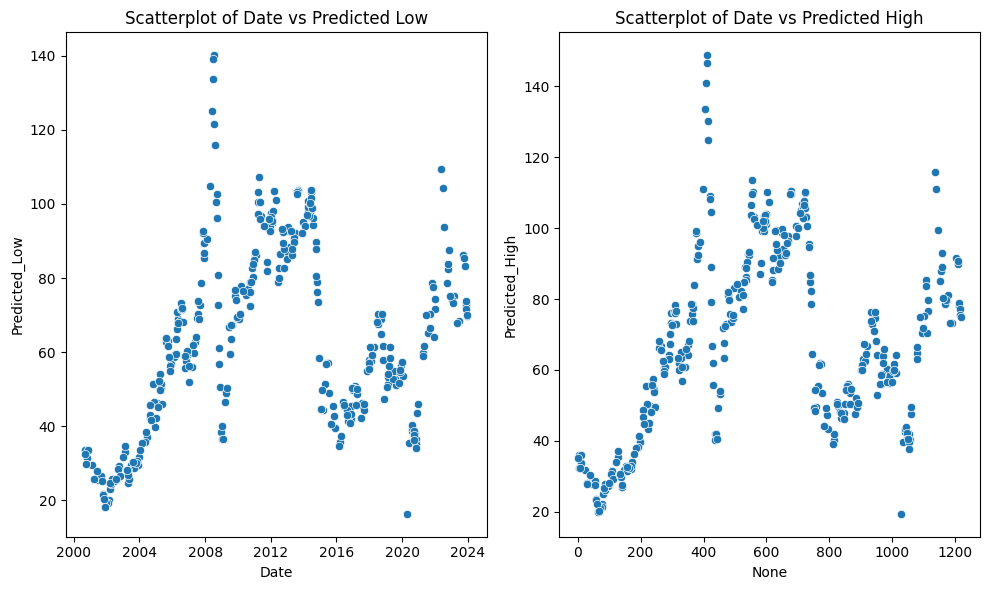

In [27]:
X_test['Predicted_High'] = predictions[:, 0]
X_test['Predicted_Low'] = predictions[:, 1]
X_test = X_test.assign(Date=df['Date'])

plt.figure(figsize=(10, 6))

# Plot 'Date' vs 'Predicted_Low'
plt.subplot(1, 2, 1)
#sns.scatterplot(x=X_test.index, y='Predicted_Low', data=X_test)
sns.scatterplot(x='Date', y='Predicted_Low', data=X_test)
plt.title('Scatterplot of Date vs Predicted Low')

# Plot 'Date' vs 'Predicted_High'
plt.subplot(1, 2, 2)
#sns.scatterplot(x=X_test.index, y='Predicted_High', data=X_test)
sns.scatterplot(x='Date', y='Predicted_High', data=X_test)
plt.title('Scatterplot of Date vs Predicted High')

plt.tight_layout()
plt.show()

### Comparison of timeseries predicted low vs low

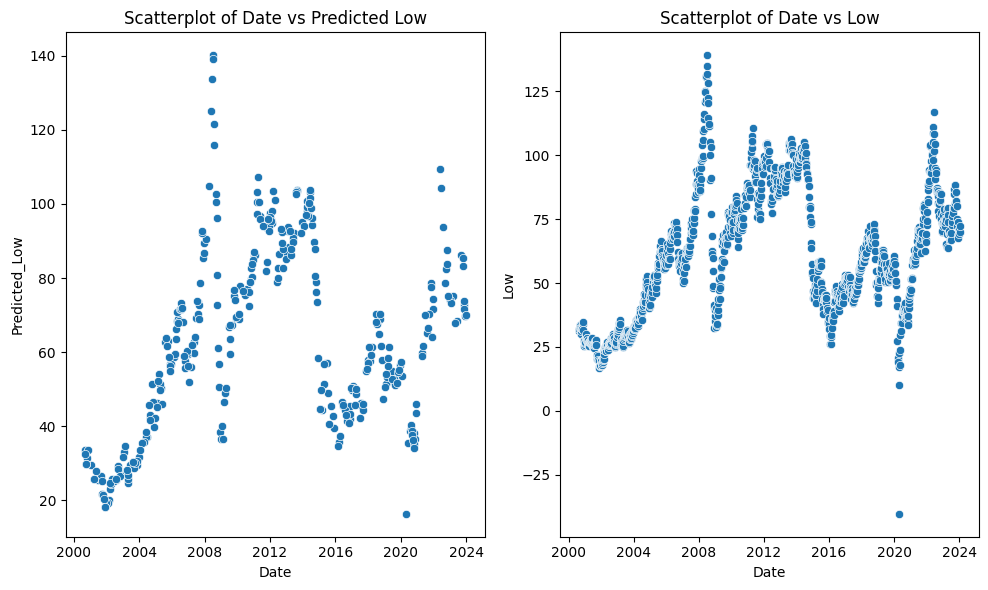

In [28]:
plt.figure(figsize=(10, 6))

# Plot 'Date' vs 'Predicted_Low'
plt.subplot(1, 2, 1)
#sns.scatterplot(x=X_test.index, y='Predicted_Low', data=X_test)
sns.scatterplot(x='Date', y='Predicted_Low', data=X_test)
plt.title('Scatterplot of Date vs Predicted Low')

# Plot 'Date' vs 'Low'
plt.subplot(1, 2, 2)
sns.scatterplot(x='Date', y='Low', data=df)
plt.title('Scatterplot of Date vs Low')

plt.tight_layout()
plt.show()

### Comparison of time series predicted high vs. high

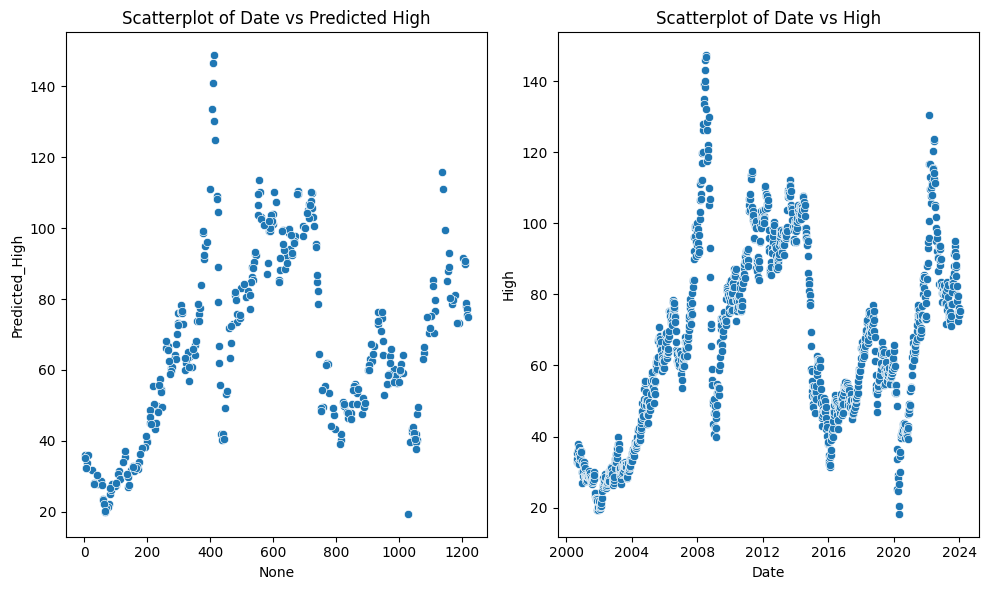

In [22]:
plt.figure(figsize=(10, 6))

# Plot 'Date' vs 'Predicted_High'
plt.subplot(1, 2, 1)
sns.scatterplot(x='Date', y='Predicted_High', data=X_test)
plt.title('Scatterplot of Date vs Predicted High')

# Plot 'Date' vs 'High'
plt.subplot(1, 2, 2)
sns.scatterplot(x='Date', y='High', data=df)
plt.title('Scatterplot of Date vs High')

plt.tight_layout()
plt.show()

### Explanation

This is a time series graph that illustrates the predicted High and Low of Crude Oil over time.

### Analysis

Visual analysis of the `Predicted Low vs Actual Low` and `Predicted High vs Actual High` indicates that the Linear Model is generally accurate. The points on y=x indicate a strong trend.

Similarly, comparison of `Date vs. Predicted Low and Date vs. Actual Low` & `Date vs. Predicted High and Date vs Actual High` indicate the model is generally correct over time. Here, we increased the test data set to be 30% of all points, which had a positive side effect of fitting the line even better.

### Error Estimation



In [20]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

mae = mean_absolute_error(y_test, predictions)
mse = mean_squared_error(y_test, predictions)
rmse = np.sqrt(mse)

print("Mean Absolute Error: ", mae)
print("Mean Squared Error: ", mse)
print("Root Mean Squared Error: ", rmse)

high_std = df['High'].std()
low_std = df['Low'].std()

print(f"Standard Deviation of 'High': {high_std}")
print(f"Standard Deviation of 'Low': {low_std}")


Mean Absolute Error:  0.9999429552621963
Mean Squared Error:  2.3386675421250906
Root Mean Squared Error:  1.529270264578858
Standard Deviation of 'High': 26.090618934183937
Standard Deviation of 'Low': 24.899131063712492


### Error Estimation explanation

MAE, or Mean Absolute Error is the average of the absolute differences between the predicted and actual values. It tells you how wrong the predictions were. 

An MAE of 0.999 against the std (standard deviation) of 26 and 24 means that the model is much better at predicting then the natural variation of the data.

MSE, or Mean Squared Error, is the average of the squared differences between the predicted and actual values. The MSE is similar to the MAE, but is more sensitive to large errors. A value of 2.33 vs 0.99 is very good.

The RMSE, or the Root Mean Squared Error, is the square root of MSE. A value of 0 indiciates perfect predictions. The RMSE is 1.53. This is signicantly smaller than the stds of 26.09 and 24.90. 

These three error metrics suggest that the models predictions are, on average, closer to the actual values than the natural variability.

### Model Improvement

The model could be improved by introducing more data points over a more narrow point of time. The data in question is data of Crude Oil, averaged over a week, from the year 2000 to 2024. The models predictions could perhaps be improved by using the Daily historical data.

For the purposes of this assignment we concluded that utilizing daily data would be too many points and it would require too much processing power. The weekly data gave us great results without the need of great processing power.


### Conclusion

In this Jupyter Notebook, we've undertaken an exploratory and analytical journey to analyze the price of oil through linear regression. 

Through a series of steps, including data loading, preprocessing, analysis, visualization, and modeling, we've gained valuable insights into prediction of oil `High` and `Low` prices.

Key findings:
- **#1**: We were able to predict high and low values with a mean absolute error of 0.99 which is outstanding.
- **#2**: Besides few outlier, oil data is very straigth forward and somewhat predictable.

The techniques and processes utilized in this notebook serve as a testament to the power of Linear Regression in model predictions. 

While the results have been enlightening, there is always room for further exploration.

For future work, the following areas could be considered:
1. **Enhanced Model Tuning**: There's always a better model to be utilized, while we used linear regression here something else might deem very adequate.
2. **Data Enrichment**: As mentioned previously, utilizing daily data would give the model more complexity and possibly improve its performance.
3. **Real-World Application**: A model like this could be utilized on real time for traders.

In summary, this Jupyter Notebook successfully developed a linear model for predicting the high and low prices of Crude Oil based on historical data. The model demonstrated good accuracy and can be further improved by incorporating additional data or refining the time frame.